<a href="https://colab.research.google.com/github/AlexanderAmaya1/MAT-421-Applied-Computational-Methods-Homework/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H: Ordinary Differential Equations
Alexander Amaya

## 22.1: ODE Initial Problem Statement

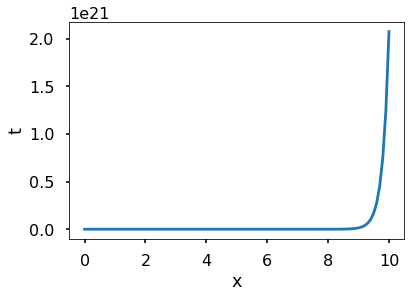

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

f = lambda x,t: 5*x-3

t0 = 1

x = np.linspace(0,10,100)

t = odeint(f,t0,x)

plt.plot(x, t[:,0])
plt.xlabel('x')
plt.ylabel('t')
plt.show()

To illustrate the problem statement I utilized a library that allows for easly solving of a differential equation.



## 22.2: Reduction of Order

In [ ]:
import numpy as np

def red_order(a1,b1,a2,b2):
  m = np.matrix([[a1, b1],[a2, b2]])
  dsdt = lambda s,t: m*s(t)

  return dsdt, m

a1 = 4
b1 = -2
a2 = 1
b2 = 1

dsdt,m = red_order(a1,b1,a2,b2)
print(m)

[[ 4 -2]
 [ 1  1]]


To illustrate the reduction of order I created a very simple function that can take the coefficients of differential equations and put them into matrix form for a reduced differential equation. 

## 22.3: Euler Method

In [ ]:
import numpy as np

def euler(f,h,t,s0):
  s = np.zeros(len(t))
  s[0] = s0

  for i in range(0, len(t) - 1):
      s[i + 1] = s[i] + h*f(t[i], s[i])

  return s

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition


# Explicit Euler Method
s = euler(f,h,t,s0)

print(s)

[-1.         -0.9        -0.80951626 -0.72764318 -0.65356136 -0.58652936
 -0.52587629 -0.47099513 -0.4213366  -0.3764037  -0.33574673]


In this example I took the Euler method example from the book and created a generalized function. 

---



## 22.4: Numerical Error and Instability

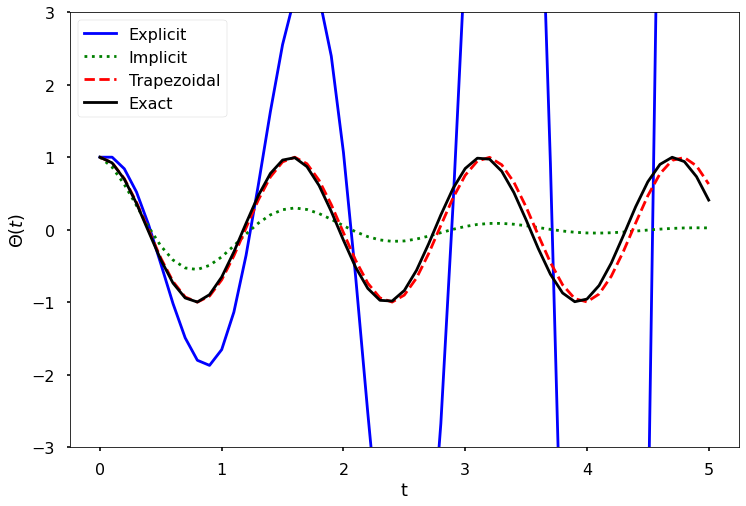

In [18]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def instability(f,h,t,s,s0):

  s[0, :] = s0.T

  for i in range(0, len(t) - 1):
      s[i+1, :] = np.dot(f,s[i, :])

  return s


# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))


s_e = euler(m_e,h,t,s_e,s0)
s_i = euler(m_i,h,t,s_i,s0)
s_t = euler(m_t,h,t,s_t,s0)

    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

For this example I generalized the instability code in the book to produce the same results.  



---



## 22.5 Predictor-Corrector and Runge Kutta Methods

In [46]:
from math import e
from scipy import integrate as i


def f(t,x):
    return x-t**2+1


sol = i.RK45(f, 0.5, [0] , 10 )

# collect data
t = []


    # get solution step state
sol.step() 
t.append(sol.t)




print(t)

[0.5001]


This example demonstrates the Runge Kutta Method in SciPy.



---



## 22.6: Python ODE Solvers

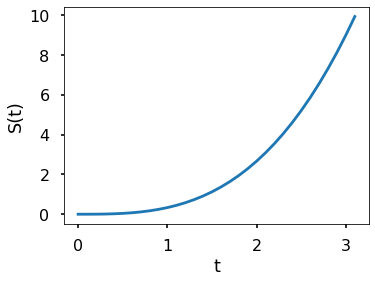

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: t**2

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')

plt.show()

This example uses a pre-built ODE solver in Python to solve $ \frac{dS(t)}{dt} = t^2$